In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "data"))
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "utils"))
from DataLoader import DataLoader

In [3]:
d_train = DataLoader()
d_train.training_data()

d_validation = DataLoader()
d_validation.validation_data()

d_test = DataLoader()
d_test.test_data()


d_train.abstracts()
d_train.data.reset_index(drop=True, inplace=True)
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_abstract)].index),
    inplace=True
)
d_train.citations()
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_citations)].index),
    inplace=True
)
d_train.data.reset_index(drop=True, inplace=True)

d_validation = DataLoader()
d_validation.validation_data()
d_validation.abstracts()
d_validation.data.reset_index(drop=True, inplace=True)
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_abstract)].index),
    inplace=True
)
d_validation.citations()
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_citations)].index),
    inplace=True
)
d_validation.data.reset_index(drop=True, inplace=True)

d_test = DataLoader()
d_test.test_data()
d_test.abstracts()
d_test.data.reset_index(drop=True, inplace=True)
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)
d_test.citations()
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_citations)].index),
    inplace=True
)
d_test.data.reset_index(drop=True, inplace=True)

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'c

## Training vs. Validation vs. Test

In [4]:
print("Training data: {} papers.".format(len(d_train.data)))
print("Validation data: {} papers.".format(len(d_validation.data)))
print("Test data: {} papers.".format(len(d_test.data)))

Training data: 137376 papers.
Validation data: 7511 papers.
Test data: 11600 papers.


## Conferences

In [5]:
conferences_train = d_train.data.conference_name.unique()
conferences_validation = d_validation.data.conference_name.unique()
conferences_test = d_test.data.conference_name.unique()

intersect_train_validation = set(conferences_train).intersection(set(conferences_validation))
intersect_train_test = set(conferences_train).intersection(set(conferences_test))
intersect_validation_test = set(conferences_validation).intersection(set(conferences_test))

count_train = len(conferences_train)
count_validation = len(conferences_validation)
count_test = len(conferences_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Conferences in training set: {}".format(count_train))
print("Conferences in validation set: {}".format(count_validation))
print("Conferences in test set: {}".format(count_test))

print("Conferences in intersection train-validation: {}, Proportion new: {}".format(
count_intersect_train_validation, round(1-count_intersect_train_validation/count_validation, 2)))
print("Conferences in intersection train-test: {}, Proportion new: {}".format(
count_intersect_train_test, round(1-count_intersect_train_test/count_test, 2)))
print("Conferences in intersection validation-test: {}, Proportion new: {}".format(
count_intersect_validation_test, round(1-count_intersect_validation_test/count_test, 2)))

Conferences in training set: 1337
Conferences in validation set: 313
Conferences in test set: 519
Conferences in intersection train-validation: 259, Proportion new: 0.17
Conferences in intersection train-test: 367, Proportion new: 0.29
Conferences in intersection validation-test: 177, Proportion new: 0.66


## Conference Series

In [6]:
conferenceseries_train = d_train.data.conferenceseries_name.unique()
conferenceseries_validation = d_validation.data.conferenceseries_name.unique()
conferenceseries_test = d_test.data.conferenceseries_name.unique()

intersect_train_validation = set(conferenceseries_train).intersection(set(conferenceseries_validation))
intersect_train_test = set(conferenceseries_train).intersection(set(conferenceseries_test))
intersect_validation_test = set(conferenceseries_validation).intersection(set(conferenceseries_test))

count_train = len(conferenceseries_train)
count_validation = len(conferenceseries_validation)
count_test = len(conferenceseries_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Conference Series in training set: {}".format(count_train))
print("Conference Series in validation set: {}".format(count_validation))
print("Conference Series in test set: {}".format(count_test))

print("Conference Series in intersection train-validation: {}, Proportion new: {}".format(
count_intersect_train_validation, round(1-count_intersect_train_validation/count_validation, 2)))
print("Conference Series in intersection train-test: {}, Proportion new: {}".format(
count_intersect_train_test, round(1-count_intersect_train_test/count_test, 2)))
print("Conference Series in intersection validation-test: {}, Proportion new: {}".format(
count_intersect_validation_test, round(1-count_intersect_validation_test/count_test, 2)))

Conference Series in training set: 1122
Conference Series in validation set: 311
Conference Series in test set: 518
Conference Series in intersection train-validation: 266, Proportion new: 0.14
Conference Series in intersection train-test: 394, Proportion new: 0.24
Conference Series in intersection validation-test: 185, Proportion new: 0.64


In [7]:
pd.set_option('display.max_colwidth', -1)
d_train.data[
    d_train.data.conferenceseries_name==conferences_train[0]][[
    "conference","conferenceseries_name","conference_name","conference_year"]]

,conference,conferenceseries_name,conference_name,conference_year
0,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
1,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
2,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
3,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
72986,<http://scigraph.springernature.com/things/conferences/6be2adc894532ce8dfca98f062673717>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2013
72987,<http://scigraph.springernature.com/things/conferences/6be2adc894532ce8dfca98f062673717>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2013
72988,<http://scigraph.springernature.com/things/conferences/6be2adc894532ce8dfca98f062673717>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2013
72989,<http://scigraph.springernature.com/things/conferences/6be2adc894532ce8dfca98f062673717>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2013
72990,<http://scigraph.springernature.com/things/conferences/6be2adc894532ce8dfca98f062673717>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2013
72991,<http://scigraph.springernature.com/things/conferences/6be2adc894532ce8dfca98f062673717>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2013


## Conference Series per Year

In [8]:
d_train = DataLoader()
d_train.training_data()
d_train.abstracts()
d_train.data.reset_index(drop=True, inplace=True)
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_abstract)].index),
    inplace=True
)
d_train.citations()
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_citations)].index),
    inplace=True
)
d_train.data.reset_index(drop=True, inplace=True)

d_validation = DataLoader()
d_validation.validation_data()
d_validation.abstracts()
d_validation.data.reset_index(drop=True, inplace=True)
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_abstract)].index),
    inplace=True
)
d_validation.citations()
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_citations)].index),
    inplace=True
)
d_validation.data.reset_index(drop=True, inplace=True)

d_test = DataLoader()
d_test.test_data()
d_test.abstracts()
d_test.data.reset_index(drop=True, inplace=True)
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)
d_test.citations()
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_citations)].index),
    inplace=True
)
d_test.data.reset_index(drop=True, inplace=True)

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_confproc_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memo

In [9]:
df = pd.concat([d_train.data, d_validation.data, d_test.data])

In [10]:
years = sorted(set(df["chapter_year"]))
df_all = set()
new = []
repeated = []
total = []
for year in years:
    current = set(df["conferenceseries"].loc[df["chapter_year"]==year])
    new.append([year, len(current.difference(df_all))])
    repeated.append([year, len(current)-len(current.difference(df_all))])
    df_all.update(current)
    total.append([year, len(current)])
df_new  = pd.DataFrame(new, columns = ["year", "conferenceseries"])
df_repeated = pd.DataFrame(repeated, columns = ["year", "conferenceseries"])
df_total = pd.DataFrame(total, columns = ["year", "conferenceseries"])

In [11]:
print(df_total)

    year  conferenceseries
0   1975  2               
1   1976  2               
2   1977  3               
3   1978  2               
4   1979  2               
5   1980  3               
6   1981  5               
7   1982  2               
8   1983  3               
9   1984  3               
10  1985  5               
11  1986  11              
12  1987  11              
13  1988  17              
14  1989  18              
15  1990  20              
16  1991  32              
17  1992  29              
18  1993  49              
19  1994  51              
20  1995  61              
21  1996  59              
22  1997  54              
23  1998  36              
24  1999  101             
25  2000  134             
26  2001  184             
27  2002  210             
28  2003  246             
29  2004  288             
30  2005  360             
31  2006  369             
32  2007  386             
33  2008  389             
34  2009  444             
35  2010  463             
3

In [12]:
print("Mean number of unique conference series per year: {}".format(df_total.mean()[1]))
print("Median number of conference series per year: {}".format(df_total.median()[1]))

Mean number of unique conference series per year: 163.83333333333334
Median number of conference series per year: 52.5


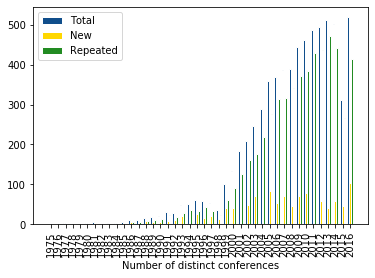

In [13]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = list(df_total["conferenceseries"])
bars2 = list(df_new["conferenceseries"])
bars3 = list(df_repeated["conferenceseries"])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#104E8B', width=barWidth, edgecolor='white', label='Total')
plt.bar(r2, bars2, color='#FFD700', width=barWidth, edgecolor='white', label='New')
plt.bar(r3, bars3, color='#228B22', width=barWidth, edgecolor='white', label='Repeated')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of distinct conferences')
plt.xticks([r + barWidth for r in range(len(bars1))], list(years), rotation=90)
 
# Create legend & Show graphic
plt.legend(loc="best")
plt.show()

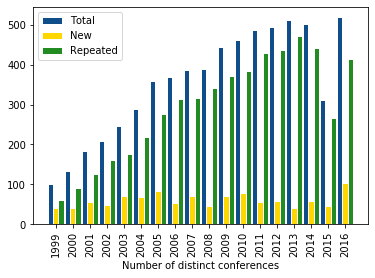

In [16]:
# set width of bar
barWidth = 0.3

# set height of bar
bars1 = list(df_total["conferenceseries"][df_total.year>="1999"])
bars2 = list(df_new["conferenceseries"][df_new.year>="1999"])
bars3 = list(df_repeated["conferenceseries"][df_repeated.year>="1999"])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#104E8B', width=barWidth, edgecolor='white', label='Total')
plt.bar(r2, bars2, color='#FFD700', width=barWidth, edgecolor='white', label='New')
plt.bar(r3, bars3, color='#228B22', width=barWidth, edgecolor='white', label='Repeated')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of distinct conferences')
plt.xticks([r + barWidth for r in range(len(bars1))], list(years[24:]), rotation=90)
 
# Create legend & Show graphic
plt.legend(loc="best")
plt.show()

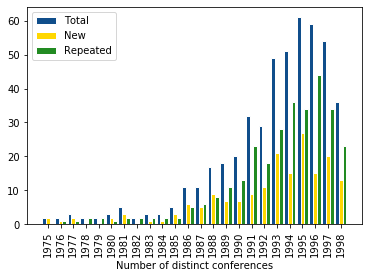

In [15]:
# set width of bar
barWidth = 0.3

# set height of bar
bars1 = list(df_total["conferenceseries"][df_total.year<"1999"])
bars2 = list(df_new["conferenceseries"][df_new.year<"1999"])
bars3 = list(df_repeated["conferenceseries"][df_repeated.year<"1999"])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#104E8B', width=barWidth, edgecolor='white', label='Total')
plt.bar(r2, bars2, color='#FFD700', width=barWidth, edgecolor='white', label='New')
plt.bar(r3, bars3, color='#228B22', width=barWidth, edgecolor='white', label='Repeated')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of distinct conferences')
plt.xticks([r + barWidth for r in range(len(bars1))], list(years[:24]), rotation=90)
 
# Create legend & Show graphic
plt.legend(loc="best")
plt.show()

## Number of Papers per Conference

In [23]:
df = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count()
print("Mean number of papers per conference: {}".format(df.mean()[0]))
print("Median number of papers per conference: {}".format(df.median()[0]))

Mean number of papers per conference: 102.81961077844312
Median number of papers per conference: 43.0


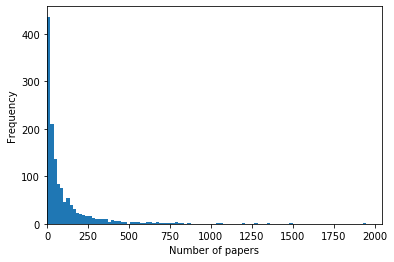

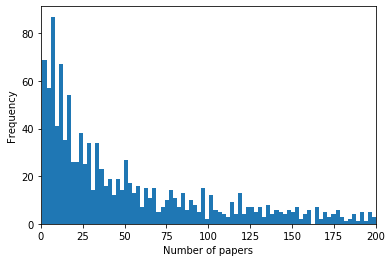

In [18]:
ax = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().plot(kind="hist",bins=100)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

ax = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().plot(kind="hist",bins=800)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0,xmax=200)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

In [19]:
d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().sort_values(
    by="chapter", ascending=False)

,chapter
conference_name,
International Conference on Medical Image Computing and Computer-Assisted Intervention,1946
European Conference on Computer Vision,1498
International Conference on Computational Science and Its Applications,1353
International Conference on Knowledge-Based and Intelligent Information and Engineering Systems,1280
"International Colloquium on Automata, Languages, and Programming",1203
International Conference on Computational Science,1061
European Conference on Parallel Processing,1036
International Conference on Conceptual Modeling,865
International Symposium on Algorithms and Computation,833


In [20]:
d_train.data[
    d_train.data.conference_name == "International Conference on Medical Image Computing and Computer-Assisted Intervention"][[
    "chapter_title","conference_year"]
]

,chapter_title,conference_year
3346,Intensity-Based 2D-3D Spine Image Registration Incorporating One Fiducial Marker,2003
3347,An Evaluation of Deformation-Based Morphometry Applied to the Developing Human Brain and Detection of Volumetric Changes Associated with Preterm Birth,2003
3348,Application of XMR 2D-3D Registration to Cardiac Interventional Guidance,2003
3349,Accuracy of a Fluoroscopy Technique for Assessing Patellar Tracking,2003
3350,Pathology Growth Model Based on Particles,2003
3351,A High Resolution Dynamic Heart Model Based on Averaged MRI Data,2003
3352,Tracking Atria and Ventricles Simultaneously from Cardiac Short- and Long-Axis MR Images,2003
3353,Four-Chamber 3-D Statistical Shape Model from Cardiac Short-Axis and Long-Axis MR Images,2003
3354,Optimum Robot Control for 3D Virtual Fixture in Constrained ENT Surgery,2003
3355,Segmentation and Evaluation of Adipose Tissue from Whole Body MRI Scans,2003


## Number of Papers per Conference Series

In [24]:
df = d_train.data[["chapter", "conferenceseries"]].groupby(["conferenceseries"]).count()
print("Mean number of papers per conference series: {}".format(df.mean()[0]))
print("Median number of papers per conference series: {}".format(df.median()[0]))

Mean number of papers per conference series: 122.00355239786856
Median number of papers per conference series: 54.0


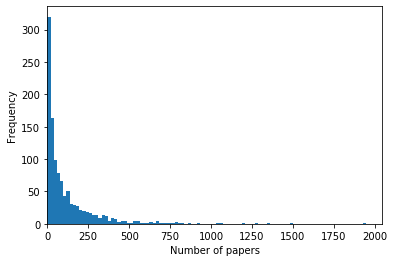

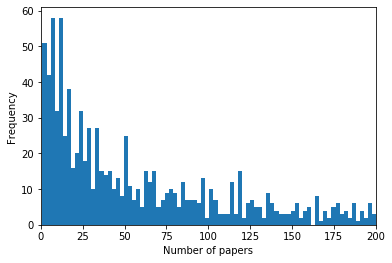

In [25]:
ax = d_train.data[["chapter","conferenceseries"]].groupby(["conferenceseries"]).count().plot(kind="hist",bins=100)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

ax = d_train.data[["chapter","conferenceseries"]].groupby(["conferenceseries"]).count().plot(kind="hist",bins=800)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0,xmax=200)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

In [26]:
d_train.data[["chapter","conferenceseries_name"]].groupby(["conferenceseries_name"]).count().sort_values(
    by="chapter", ascending=False)

,chapter
conferenceseries_name,
International Conference on Medical Image Computing and Computer-Assisted Intervention,1946
European Conference on Computer Vision,1498
International Conference on Computational Science and Its Applications,1353
International Conference on Knowledge-Based and Intelligent Information and Engineering Systems,1280
"International Colloquium on Automata, Languages, and Programming",1203
International Conference on Computational Science,1061
European Conference on Parallel Processing,1036
European Working Session on Learning,933
International Conference on Conceptual Modeling,865


## Conference vs. Conference Series

In [27]:
df = d_train.data[["conference","conferenceseries"]].drop_duplicates()
df.groupby("conferenceseries").count().reset_index() \
    .merge(df,on=["conferenceseries","conferenceseries"]) \
    .sort_values(by=["conference_x","conferenceseries"],ascending=False)

,conferenceseries,conference_x,conference_y
5285,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/fb581e0ee657315ad6835cb821fce86c>
5286,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/7e20bfe02b665d5fb9203375ddc308cf>
5287,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/8b03dd7baad21b789273b8e7ac44810d>
5288,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/038d920c525c79fdd599afeeb416c4df>
5289,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/de551d22854bee79b8c5c1f64eae5ab1>
5290,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/acc3430fb29862a16011fba2951e8508>
5291,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/d2899f92b834de4f3b3d9f1827920618>
5292,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/d2c85d67877993b2ccb59566fb5875c3>
5293,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/0e01d5fba436d77ce57d60a6c2ce8462>
5294,<http://scigraph.springernature.com/things/conference-series/d895faf9e492baa442e9e163eb0b57a8>,31,<http://scigraph.springernature.com/things/conferences/ed38c8c7f2fb5eb28e2230438b7bceb7>


## Conference name vs. Conference Series

In [28]:
df = d_train.data[["conference","conferenceseries"]].drop_duplicates()
df.groupby("conference").count().reset_index() \
    .merge(df,on=["conference","conference"],how="left") \
    .sort_values(by=["conferenceseries_x","conference"],ascending=False)

,conference,conferenceseries_x,conferenceseries_y
6216,<http://scigraph.springernature.com/things/conferences/ffedb10d02db573eb4821e7ca0d73d07>,1,<http://scigraph.springernature.com/things/conference-series/cceccd3c1178e5cffbcd43149abd8441>
6215,<http://scigraph.springernature.com/things/conferences/ffea88e40c769ed37597b326d4d404dd>,1,<http://scigraph.springernature.com/things/conference-series/baec85a2d99bdefb47ca2b4b9316a8b9>
6214,<http://scigraph.springernature.com/things/conferences/ffdfe1b36dd0e2a701f117aa99237e65>,1,<http://scigraph.springernature.com/things/conference-series/e47ad665ce406c84751c2912fce06d24>
6213,<http://scigraph.springernature.com/things/conferences/ffd7b8cef2ef877fb28f45c37d3a23c2>,1,<http://scigraph.springernature.com/things/conference-series/364258ad4d5f572c0ef52ff484fbb894>
6212,<http://scigraph.springernature.com/things/conferences/ffbfc67fafa80986346ca4233ca267fb>,1,<http://scigraph.springernature.com/things/conference-series/2d1ce4ce6a94399b04c2a11fc14e3d46>
6211,<http://scigraph.springernature.com/things/conferences/ffbe0fb5cd308faf5bb01d9e638c2a3f>,1,<http://scigraph.springernature.com/things/conference-series/654dc2a6e890a6c997d96bfba035b0c2>
6210,<http://scigraph.springernature.com/things/conferences/ffb87e8c91dbc3684ce60414bc7943fe>,1,<http://scigraph.springernature.com/things/conference-series/86e110875b0089787dcf7026a826bbf0>
6209,<http://scigraph.springernature.com/things/conferences/ffb19f05b43371ca4f0b9c77fe33605d>,1,<http://scigraph.springernature.com/things/conference-series/7c44bd45758c12267c503574149db1d0>
6208,<http://scigraph.springernature.com/things/conferences/ffa8b3560fef38e5c5ff86418656a042>,1,<http://scigraph.springernature.com/things/conference-series/564ac73c873afb80f2691606cf508da3>
6207,<http://scigraph.springernature.com/things/conferences/ffa5edf46b69811fcb11b3b2a7292072>,1,<http://scigraph.springernature.com/things/conference-series/ca9a42130a57ad948d87f75b102e61d7>
